#NUEVA VERSION

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng

df = pd.read_csv("datos_peru_MSCI.csv", index_col=0, parse_dates=True)
df.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14072\1600930683.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("datos_peru_MSCI.csv", index_col=0, parse_dates=True)


,BAP,SPCCPI1,BUENAVC1,IFS,MINSURI1,INRETC1,CVERDEC1,FERREYC1,CREDITC1,UNACEMC1,...,PODERC1,RIMSEGC1,CASAGRC1,BACKUAC1,NEXAPEC1,AENZAC1,SNJUANC1,CORAREC1,SIDERC1,CARTAVC1
2016-03-31,130.65,16.5,24.66,24.90,1.02,16.10,19.38,1.45,4.32,2.25,...,2.65,1.27,6.73,130.3,2.08,2.74,19.2,0.62,0.220,9.3
2016-04-01,130.70,16.5,24.66,25.84,1.03,16.85,20.40,1.47,4.35,2.25,...,2.65,1.27,7.12,128.0,2.10,2.80,19.2,0.62,0.225,9.3
2016-04-04,127.55,16.5,24.66,25.00,0.95,16.45,20.00,1.45,4.35,2.25,...,2.65,1.27,6.51,128.0,2.02,2.75,19.2,0.62,0.210,9.3
2016-04-05,127.50,16.5,24.66,25.00,0.95,16.20,20.00,1.45,4.35,2.20,...,2.65,1.27,6.50,128.0,2.02,2.80,19.2,0.62,0.188,9.3
2016-04-06,125.88,16.5,24.66,24.58,0.92,16.20,19.99,1.42,4.34,2.10,...,2.31,1.26,6.80,128.0,1.95,2.75,19.2,0.62,0.188,9.3


Eligiendo datos y periodos para la simulacion: Solo usamos una parte de la data, 4 empresas y 200 dias

In [20]:
data = df[['BAP','PODERC1','CREDITC1','CVERDEC1']].iloc[-201:-1]
data.head()

,BAP,PODERC1,CREDITC1,CVERDEC1
2024-06-17,154.40,8.0,3.30,39.50
2024-06-18,156.27,8.0,3.20,39.20
2024-06-19,157.80,8.0,3.30,39.70
2024-06-20,157.00,7.9,3.29,39.75
2024-06-21,159.00,8.0,3.29,40.00


Calculando los retornos (Wi)

In [21]:
#W = data / data.shift(1)
W = data.pct_change()
W.head(15).dropna()

,BAP,PODERC1,CREDITC1,CVERDEC1
2024-06-18,0.012111,0.000000,-0.030303,-0.007595
2024-06-19,0.009791,0.000000,0.031250,0.012755
2024-06-20,-0.005070,-0.012500,-0.003030,0.001259
2024-06-21,0.012739,0.012658,0.000000,0.006289
2024-06-24,-0.006289,0.003750,0.000000,-0.010000
2024-06-25,0.025316,0.000000,-0.027356,0.000000
2024-06-26,0.000000,0.000000,0.000000,-0.012626
2024-06-27,0.012346,0.000000,0.000000,0.012788
2024-06-28,-0.027500,-0.003736,0.012500,-0.010101
2024-07-01,0.003198,0.000000,0.000000,0.010204


1. Estimacion de la matriz de covarianzas

In [22]:
Q = W.cov()
Q

,BAP,PODERC1,CREDITC1,CVERDEC1
BAP,0.000238,0.000020,0.000023,0.000037
PODERC1,0.000020,0.000185,0.000014,0.000020
CREDITC1,0.000023,0.000014,0.000198,0.000002
CVERDEC1,0.000037,0.000020,0.000002,0.000134


2. Simulando retornos empleando choleski

In [23]:
from numpy.random import default_rng
rng = default_rng()
L = np.linalg.cholesky(Q)
N_muestras = 1000000
Z = rng.standard_normal(size=(N_muestras, Q.shape[1]))
W_sim = Z @ L.T
#print(W_sim)

3. Calculando X, para t=90

In [24]:
t = 5
mu = W.mean()
#print("Medias de los retornos")
#print(mu)
X = np.exp(mu.values + (t**0.5)*W_sim)
#print("Retornos simulados")
#print(X)

5. Generando el vector C a partir de un simplex empleando una distribucion de dirichlet:

In [25]:
rng = np.random.default_rng(42)
d = 4          # dimensión del simplex
n_samples = 700

# cada fila de samples es un vector en el simplex (suma 1, no negativo)
c = rng.dirichlet(alpha=np.ones(d), size=n_samples)

4. Calculamos Y, valores de los portafolios para todas las simulacion y distintos valores de C

In [26]:
Y = np.dot(X,c.T)
print(Y.shape)

(1000000, 700)


Cada columna de Y son los valores del portafolio para cada C definido, y cada fila de Y son los valores del portafolio para distintos valores de C de una solo simulacion. el numero de filas es igual al numero de simulaciones y el numero de columnas es igual al numero de C generados por el simplex. Por lo tanto se estan reusando los valores de las simulaciones para cada valor de C.

6. Calculando los valores de las medias y el ES(c)

In [27]:
Y_df = pd.DataFrame(Y)
p= 0.05 #5%
N = N_muestras
NP_entero = int(np.floor(N*p))
medias = Y_df.mean()

print(medias.shape)
print(NP_entero)

(700,)
50000


Ordenamos los valores de los portafolios usando QUICKSORT

In [28]:
#Y_df_sorted = pd.DataFrame(
#    np.sort(Y_df.values, axis=0, kind="quicksort"),
#    columns=Y_df.columns
#)

###############################
#Y_df_sorted = pd.DataFrame({
#    col: np.sort(Y_df[col].to_numpy())
#    for col in Y_df.columns
#})
###############################
#ESc= Y_df_sorted.iloc[0:NP_entero].sum(axis=0)/NP_entero

###############################
ESc = []
for col in Y_df.columns:
  vector_ordenado = np.sort(Y_df[col].to_numpy())
  ESc.append(vector_ordenado[0:NP_entero].sum(axis=0)/NP_entero)
######################

Graficando resultados

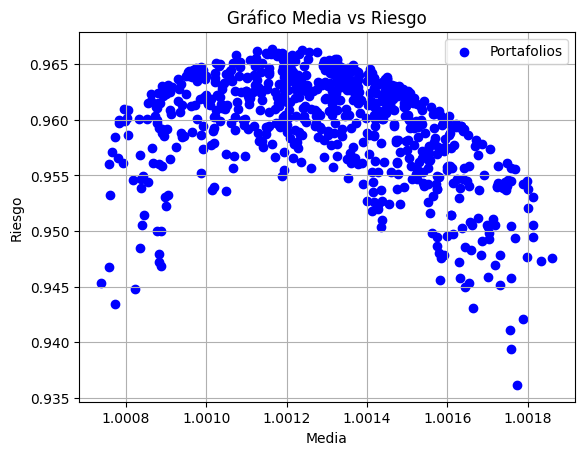

In [29]:
plt.scatter(medias, ESc, color='blue', label='Portafolios')
plt.xlabel("Media")
plt.ylabel("Riesgo")
plt.title("Gráfico Media vs Riesgo")
plt.legend()
plt.grid(True)
plt.show()

Calculando el punto optimo para un determinado "nivel de riesgo"

Normalizando los datos de medias y riesgo

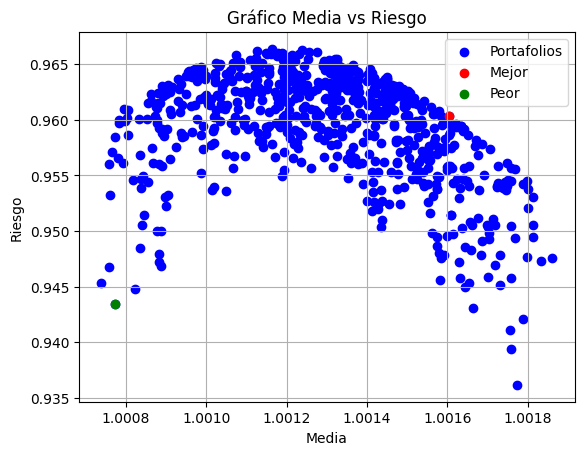

In [30]:
#Guardado los resultados de medias y riesgo en un dataframe
Resultados = pd.DataFrame({
    "Media": medias,
    "Riesgo": ESc
    }
)

#Normalizando los datos
Resultados["Media"] = (Resultados["Media"] - Resultados["Media"].mean()) / Resultados["Media"].std()
Resultados["Riesgo"] = (Resultados["Riesgo"] - Resultados["Riesgo"].mean()) / Resultados["Riesgo"].std()

#Obteniendo los mejores portafolios
m = -1.5
Resultados['Orden'] = Resultados['Riesgo']-m*Resultados['Media']
indice_max_res=np.argmax(Resultados['Orden'])

#Obteniendo los peores portafolios
m = -1.8
Resultados['Orden'] = Resultados['Riesgo']-m*Resultados['Media']
indice_min_res=np.argmin(Resultados['Orden'])


#Graficando los resultados
#plt.scatter(Resultados["Media"], Resultados["Riesgo"], color='blue', label='Portafolios')
#plt.scatter(Resultados["Media"][indice_max_res], Resultados["Riesgo"][indice_max_res], color='red', label='Portafolios')
#plt.scatter(Resultados["Media"][indice_min_res], Resultados["Riesgo"][indice_min_res], color='green', label='Portafolios')
plt.scatter(medias, ESc, color='blue', label='Portafolios')
plt.scatter(medias[indice_max_res], ESc[indice_max_res], color='red', label='Mejor')
plt.scatter(medias[indice_min_res], ESc[indice_min_res], color='green', label='Peor')
plt.xlabel("Media")
plt.ylabel("Riesgo")
plt.title("Gráfico Media vs Riesgo")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
print("Mejor portafolio:",c[indice_max_res])
print("Peor portafolio:",c[indice_min_res])

Mejor portafolio: [0.2939338  0.08552009 0.48219421 0.1383519 ]
Peor portafolio: [0.00460196 0.92677278 0.03223137 0.03639389]


#Funcion:

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng

#Retornos:

def Portafolio(data,N_muestras,t,n_porfolios,p,m1,m2):
  #data: dataframe con precios de acciones
  #N_muestras: numero de simulaciones
  #n_portfolios: Numero de portafolios simulados con simplex
  #p: nivel del Expected Shortfall de los p% peores casos
  #m1: pendiente de la recta tangen a la curva para mejores portafolios
  #m2: pendiente de la recta tangen a la curva para peores portafolios

  W = data.pct_change()
  W.head(15).dropna()
  #Matriz de covarianzas:
  Q = W.cov()
  #Simulacion de retornos
  rng = default_rng()
  L = np.linalg.cholesky(Q)
  Z = rng.standard_normal(size=(N_muestras, Q.shape[1]))
  W_sim = Z @ L.T

  mu = W.mean()
  X = np.exp(mu.values + (t**0.5)*W_sim)

  #Generacion de pesos de portafolios:
  rng = np.random.default_rng(42)
  d = Q.shape[1]      # dimensión del simplex
  c = rng.dirichlet(alpha=np.ones(d), size=n_porfolios)
  Y = np.dot(X,c.T)

  #Calculando los valores de las medias:
  Y_df = pd.DataFrame(Y)
  N = N_muestras
  NP_entero = int(np.floor(N*p))
  medias = Y_df.mean()

  #Calculando los valores del ES
  ESc = []
  for col in Y_df.columns:
    vector_ordenado = np.sort(Y_df[col].to_numpy())
    ESc.append(vector_ordenado[0:NP_entero].sum(axis=0)/NP_entero)

  #############################################################################
  #############################################################################

  #Guardado los resultados de medias y riesgo en un dataframe
  Resultados = pd.DataFrame({
      "Media": medias,
      "Riesgo": ESc
      }
  )

  #Normalizando los datos
  Resultados["Media"] = (Resultados["Media"] - Resultados["Media"].mean()) / Resultados["Media"].std()
  Resultados["Riesgo"] = (Resultados["Riesgo"] - Resultados["Riesgo"].mean()) / Resultados["Riesgo"].std()

  #Obteniendo los mejores portafolios
  #m1 = -1.5
  Resultados['Orden'] = Resultados['Riesgo']-m1*Resultados['Media']
  indice_max_res=np.argmax(Resultados['Orden'])

  #Obteniendo los peores portafolios
  #m2 = -1.8
  Resultados['Orden'] = Resultados['Riesgo']-m2*Resultados['Media']
  indice_min_res=np.argmin(Resultados['Orden'])

  #Graficando resultados:
  plt.scatter(medias, ESc, color='blue', label='Portafolios')
  plt.scatter(medias[indice_max_res], ESc[indice_max_res], color='red', label='Mejor')
  plt.scatter(medias[indice_min_res], ESc[indice_min_res], color='green', label='Peor')
  plt.xlabel("Media")
  plt.ylabel("Riesgo")
  plt.title("Gráfico Media vs Riesgo")
  plt.legend()
  plt.grid(True)
  plt.show()

  #Imprimiendo portafolios:
  print("Mejor portafolio:",c[indice_max_res])
  print("Peor portafolio:",c[indice_min_res])
  return indice_min_res,indice_max_res,c,Y[:,indice_max_res],Y[:,indice_min_res],ESc[indice_max_res],ESc[indice_min_res]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14072\4250302082.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("datos_peru_MSCI.csv", index_col=0, parse_dates=True)


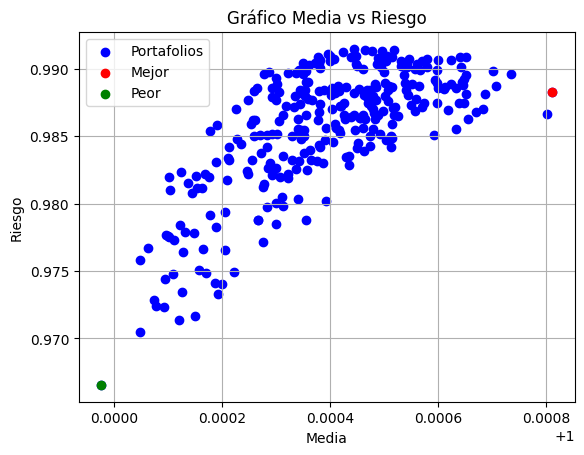

Mejor portafolio: [0.03349817 0.40406665 0.0016854  0.00996188 0.5507879 ]
Peor portafolio: [0.82791005 0.0091432  0.0959483  0.02542271 0.04157574]


In [33]:
N_muestras = 1000000
t = 1
n_portafolios = 300
p= 0.05 #5%
m1 = -1.0
m2 = -1.0
N_dias = 200
df = pd.read_csv("datos_peru_MSCI.csv", index_col=0, parse_dates=True)
data = df[['BUENAVC1','FERREYC1','BROCALC1','BACKUAC1','ORYGENC1']].iloc[-N_dias-1:-1]

indice_min_res,indice_max_res,c,Sim_best,Sim_worst,ES_best,ES_worst = Portafolio(data,N_muestras,t,n_portafolios,p,m1,m2)

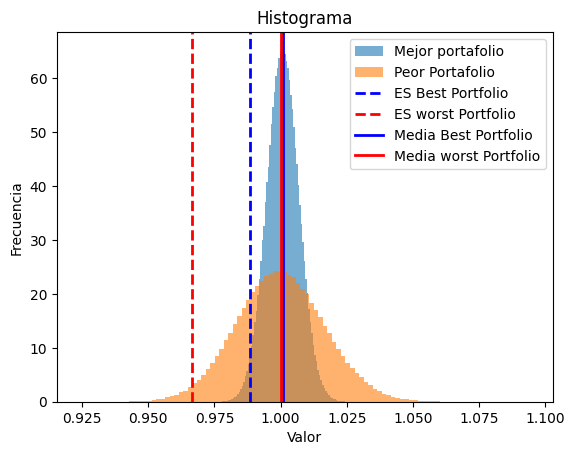

In [34]:
plt.hist(Sim_best, bins=100, alpha=0.6, label="Mejor portafolio", density=True)
plt.hist(Sim_worst, bins=100, alpha=0.6, label="Peor Portafolio", density=True)

plt.axvline(ES_best, color="blue", linestyle="--", linewidth=2, label="ES Best Portfolio")
plt.axvline(ES_worst, color="red", linestyle="--", linewidth=2, label="ES worst Portfolio")

plt.axvline(Sim_best.mean(), color="blue", linestyle="-", linewidth=2, label="Media Best Portfolio")
plt.axvline(Sim_worst.mean(), color="red", linestyle="-", linewidth=2, label="Media worst Portfolio")

plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.legend()
plt.show()